Rotated checkerboard dataset. Rotating 2*PI.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  2.838469613000001
Average MCC:  -0.0207114182669088
Average error: 50.97580000000001
Average macro-F1: 0.48679190407189343
Average micro-F1: 0.4889
Average Accuracy:  49.02419999999999
Standard Deviation:  10.617829550336547
Variance:  112.73830435999999


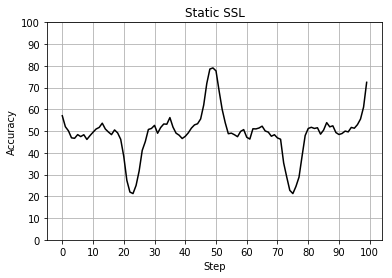

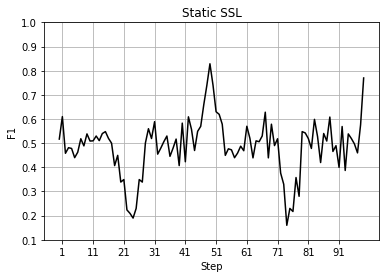

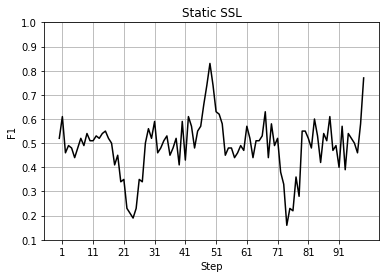




METHOD: Sliding lp as classifier
Execution time:  2.0089887900000036
Average MCC:  -0.025947168605742706
Average error: 50.837599999999995
Average macro-F1: 0.468859246127417
Average micro-F1: 0.4865
Average Accuracy:  49.162400000000005
Standard Deviation:  3.26173638419784
Variance:  10.63892424


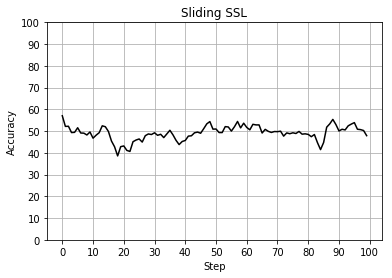

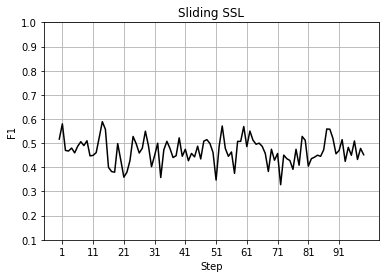

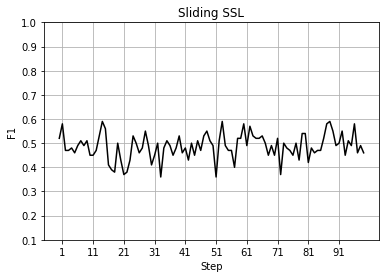




METHOD: Incremental lp as classifier
Execution time:  65.14668392499999
Average MCC:  -0.013455523737055594
Average error: 50.99689999999999
Average macro-F1: 0.4903936873372971
Average micro-F1: 0.4923
Average Accuracy:  49.00310000000001
Standard Deviation:  10.930516977252266
Variance:  119.47620139


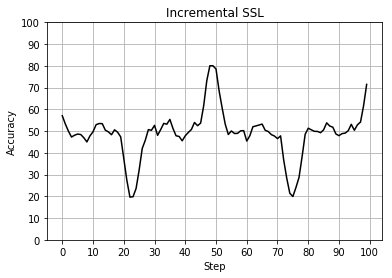

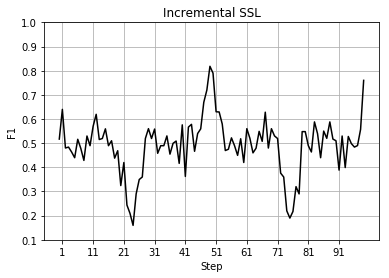

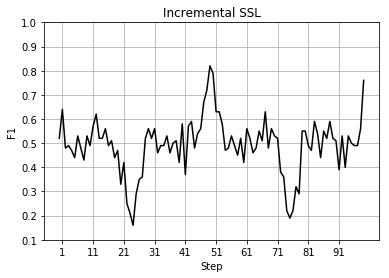




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  24.20569965099999
Average MCC:  -0.013795479653922858
Average error: 50.3401
Average macro-F1: 0.485265950473174
Average micro-F1: 0.49229999999999996
Average Accuracy:  49.6599
Standard Deviation:  3.3817559033732763
Variance:  11.436272990000004


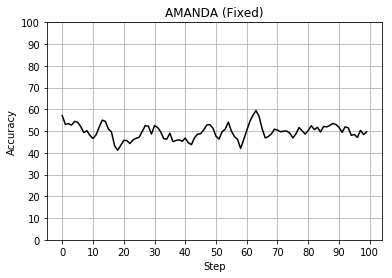

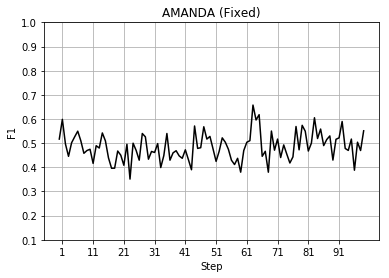

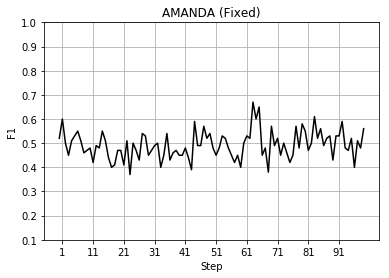




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.17 | Std keeping percentage=0.08
Execution time:  26.903200103000017
Average MCC:  0.016653171607852818
Average error: 49.73349999999999
Average macro-F1: 0.5051443732434994
Average micro-F1: 0.5087999999999999
Average Accuracy:  50.26650000000001
Standard Deviation:  2.987062896893871
Variance:  8.922544750000005


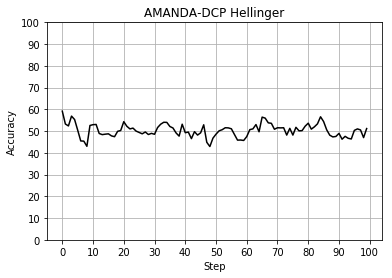

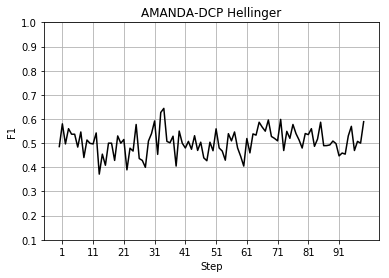

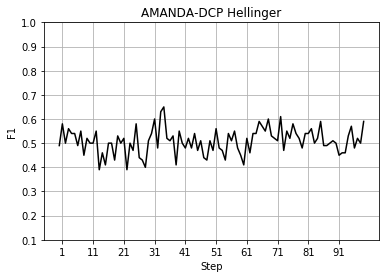




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.18 | Std keeping percentage=0.01
Execution time:  31.563561012999998
Average MCC:  0.012403266129161997
Average error: 49.97120000000001
Average macro-F1: 0.5028921208698522
Average micro-F1: 0.5055
Average Accuracy:  50.02879999999999
Standard Deviation:  2.6351642377658364
Variance:  6.944090560000002


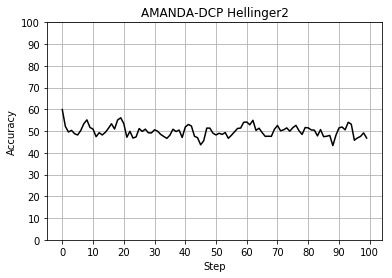

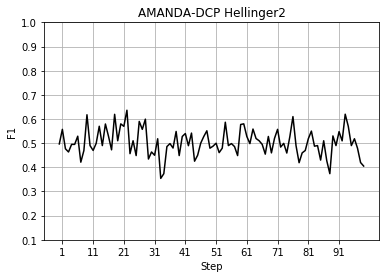

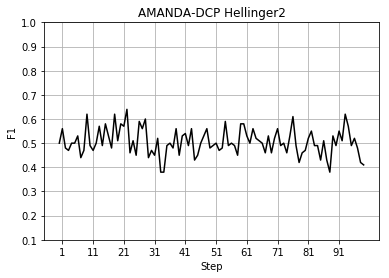




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.25 | Std keeping percentage=0.15
Execution time:  35.25311363899999
Average MCC:  0.013821125292018595
Average error: 49.8421
Average macro-F1: 0.5028564210397942
Average micro-F1: 0.5057999999999999
Average Accuracy:  50.1579
Standard Deviation:  2.686354516812701
Variance:  7.216500590000002


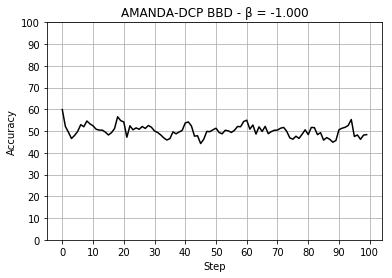

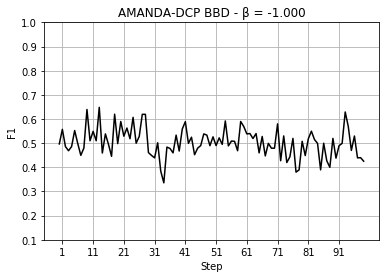

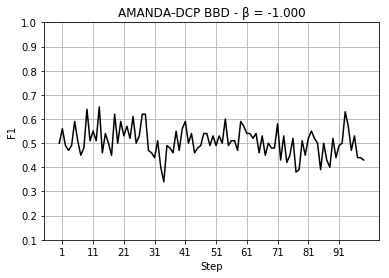




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.16 | Std keeping percentage=0.03
Execution time:  40.692944884999974
Average MCC:  -0.0159493755698102
Average error: 49.9709
Average macro-F1: 0.4879334370093359
Average micro-F1: 0.4920999999999999
Average Accuracy:  50.0291
Standard Deviation:  3.0421624200558393
Variance:  9.254752190000001


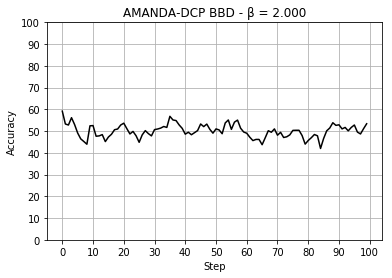

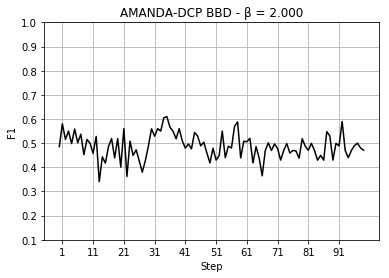

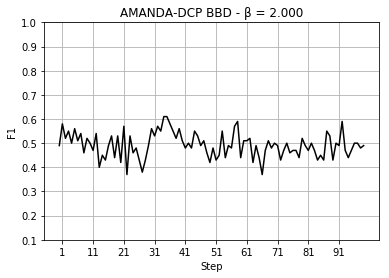




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.18 | Std keeping percentage=0.08
Execution time:  33.42859294499999
Average MCC:  -0.0021504352489702884
Average error: 49.7488
Average macro-F1: 0.49472084195165644
Average micro-F1: 0.4992000000000001
Average Accuracy:  50.2512
Standard Deviation:  2.4783152664663146
Variance:  6.14204656


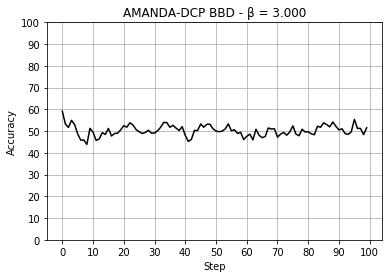

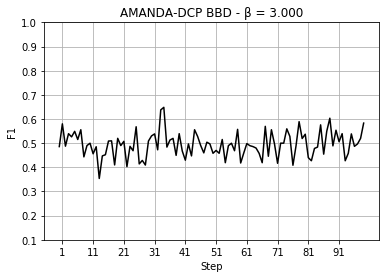

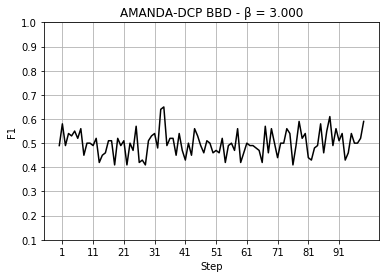




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.20 | Std keeping percentage=0.10
Execution time:  30.35410566500002
Average MCC:  0.012167941254312064
Average error: 49.71760000000001
Average macro-F1: 0.502208730621388
Average micro-F1: 0.5053
Average Accuracy:  50.28239999999999
Standard Deviation:  2.8288962936099304
Variance:  8.002654240000002


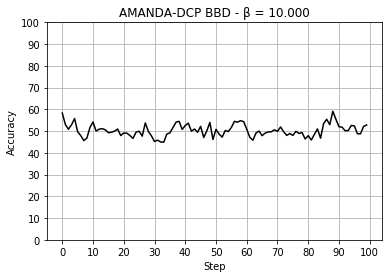

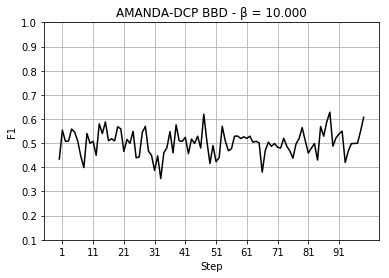

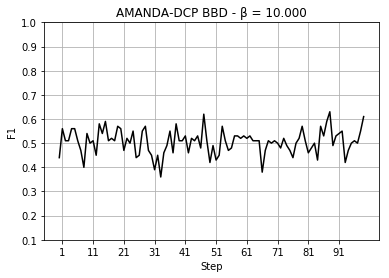

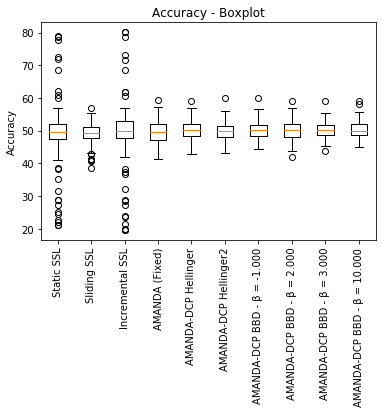

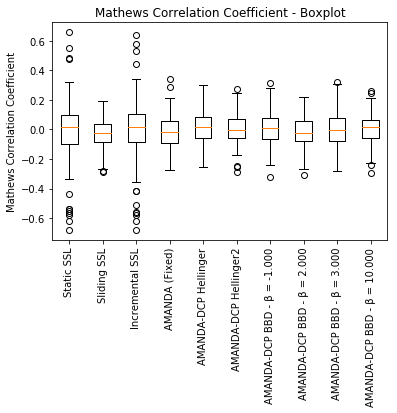

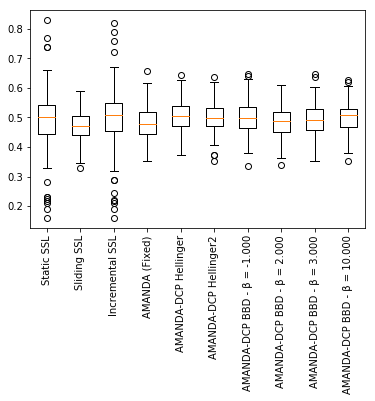

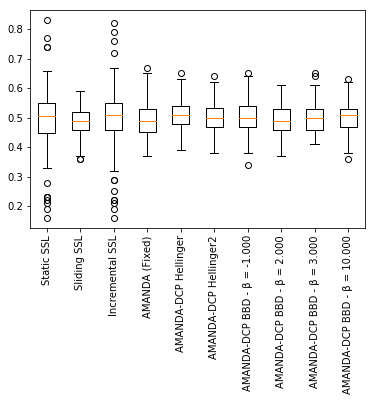

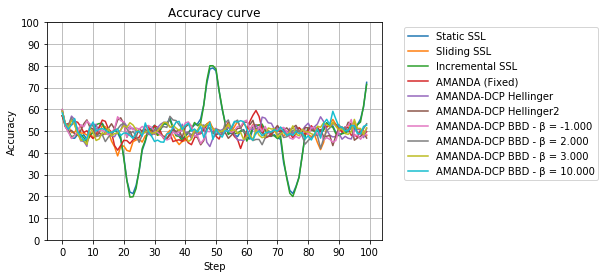

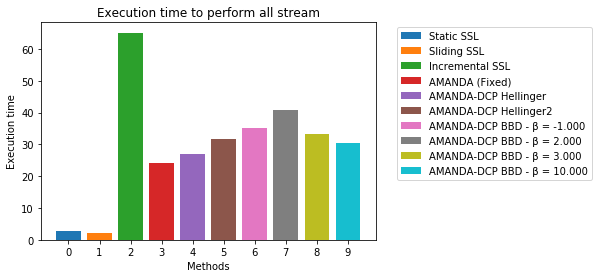

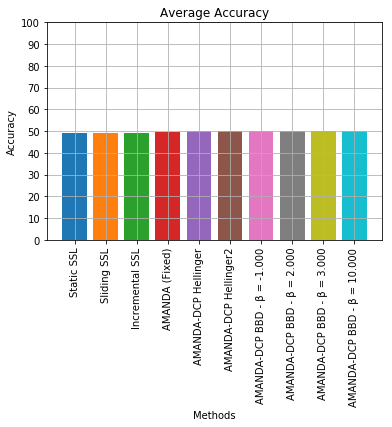

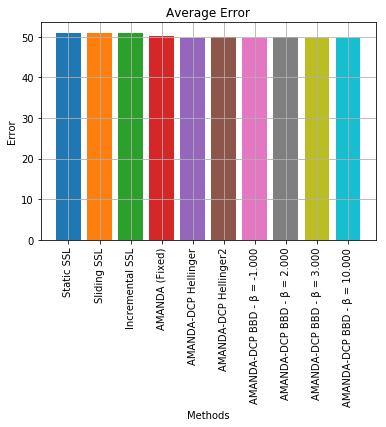

Pos 8 - Error reduction (Sliding SSL):0.28190159145893634
Pos 10 - Error reduction (Incremental SSL):-0.0430399680157612
Pos 7 - Error reduction (AMANDA (Fixed)):1.2967065245327962
Pos 2 - Error reduction (AMANDA-DCP Hellinger):2.534054609764187
Pos 6 - Error reduction (AMANDA-DCP Hellinger2):2.049192031690464
Pos 4 - Error reduction (AMANDA-DCP BBD - β = -1.000):2.3125313620620114
Pos 5 - Error reduction (AMANDA-DCP BBD - β = 2.000):2.049803974363695
Pos 3 - Error reduction (AMANDA-DCP BBD - β = 3.000):2.5028455334304365
Pos 1 - Error reduction (AMANDA-DCP BBD - β = 10.000):2.566487571444297


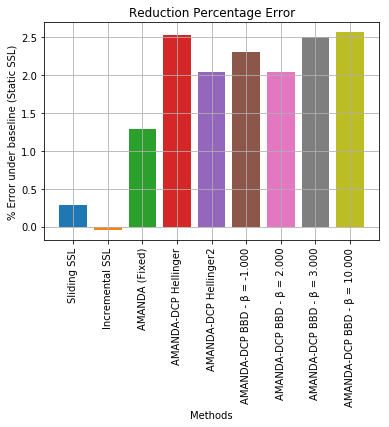

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCheckerBoard(path, sep)
    
    # 20% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 3, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 3, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 3, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 3, 0.65, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 8, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 12, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [12, 8, 8, 6]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])

    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 10, None, "kde", sslClassifier, 'HDDDM')

    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CHT', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()